## Transfer Learning VGG19 using Keras

In [2]:
# This model was created using google colab:
# To check your GPU
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Apr 28 12:10:09 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Please download the dataset from the below url

In [3]:
# Tensorflow GPU
import tensorflow as tf 

if tf.test.gpu_device_name(): 
    

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [4]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
# Unzip the file
#!unzip /content/drive/MyDrive/Datasets.zip

In [6]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [107]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [108]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Cotton_Disease/train'
valid_path = '/content/drive/MyDrive/Cotton_Disease/test'


In [109]:
# Import the Vgg 19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

VGG19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




80142336/80134624 [==============================] - 1s 0us/step


In [110]:
# don't train existing weights
for layer in VGG19.layers:
    layer.trainable = False

In [111]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Cotton_Disease/train/*')

In [112]:
# our layers - you can add more if you want
x = Flatten()(VGG19.output)

In [113]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=VGG19.input, outputs=prediction)

In [114]:

# view the structure of the model
model.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [115]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [116]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [117]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Cotton_Disease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [118]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Cotton_Disease/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 106 images belonging to 4 classes.


In [119]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
61/61 [==============================] - 35s 558ms/step - loss: 1.0288 - accuracy: 0.6142 - val_loss: 0.3091 - val_accuracy: 0.8679
Epoch 2/50
61/61 [==============================] - 33s 534ms/step - loss: 0.3141 - accuracy: 0.8884 - val_loss: 0.2128 - val_accuracy: 0.9434
Epoch 3/50
61/61 [==============================] - 32s 532ms/step - loss: 0.2371 - accuracy: 0.9076 - val_loss: 0.2532 - val_accuracy: 0.8962
Epoch 4/50
61/61 [==============================] - 33s 545ms/step - loss: 0.1582 - accuracy: 0.9484 - val_loss: 0.1715 - val_accuracy: 0.9245
Epoch 5/50
61/61 [==============================] - 33s 541ms/step - loss: 0.1693 - accuracy: 0.9364 - val_loss: 0.2075 - val_accuracy: 0.9057
Epoch 6/50
61/61 [==============================] - 33s 540ms/step - loss: 0.1429 - accuracy: 0.9484 - val_loss: 0.1106 - val_accuracy: 0.9811
Epoch 7/50
61/61 [==============================] - 33s 539ms/step - loss: 0.1435 - accuracy: 0.9498 - val_loss: 0.0882 - val_accuracy: 0.9811

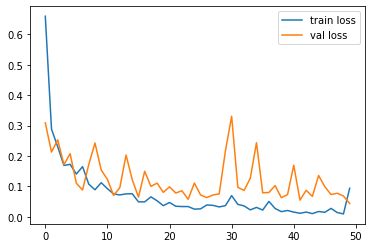

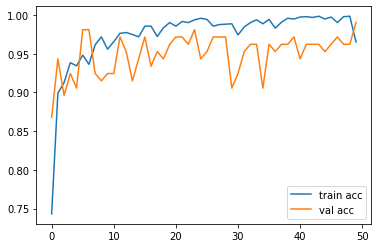

<Figure size 432x288 with 0 Axes>

In [120]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss_cotton_VGG19')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc_cotton_VGG19')

In [121]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_cotton_VGG19.h5')

In [122]:

y_pred = model.predict(test_set)


In [123]:
y_pred

array([[3.20455051e-11, 1.04111173e-07, 5.41268376e-12, 9.99999881e-01],
       [5.79860899e-12, 3.02371632e-06, 3.41415131e-07, 9.99996662e-01],
       [2.17417218e-09, 9.99991655e-01, 1.54646504e-11, 8.33464219e-06],
       [9.99999285e-01, 6.49141839e-07, 1.20016665e-07, 5.80734394e-09],
       [9.99906659e-01, 9.32898402e-05, 1.23745727e-11, 1.98317940e-09],
       [7.55422298e-06, 1.91514111e-08, 9.99992251e-01, 6.72553853e-08],
       [9.99903440e-01, 2.04394807e-10, 9.60720427e-05, 4.34093607e-07],
       [5.93654420e-07, 9.86511350e-01, 3.84458282e-04, 1.31036090e-02],
       [1.00000000e+00, 1.99098946e-10, 1.17647642e-10, 4.50704647e-11],
       [1.00463538e-07, 9.99848366e-01, 2.40094478e-09, 1.51438944e-04],
       [1.58996158e-06, 9.99830484e-01, 3.40101508e-07, 1.67597769e-04],
       [9.99998331e-01, 2.99437460e-07, 6.25283576e-07, 7.05028640e-07],
       [1.06233067e-09, 9.99959111e-01, 1.68010700e-07, 4.07128136e-05],
       [3.08881409e-09, 1.73941274e-07, 9.99999404e

In [124]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [125]:
y_pred

array([3, 3, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 3, 2, 3, 3,
       0, 2, 1, 2, 1, 0, 2, 3, 1, 3, 1, 3, 2, 0, 1, 3, 0, 1, 1, 2, 1, 1,
       3, 1, 2, 3, 3, 1, 2, 2, 2, 3, 1, 2, 1, 3, 0, 3, 2, 0, 0, 1, 3, 0,
       0, 2, 0, 2, 2, 3, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 3, 3, 3, 1, 0, 3,
       2, 3, 3, 2, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2, 2, 0, 1, 3])

In [126]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [127]:
model=load_model('model_cotton_VGG19.h5')

In [128]:
img=image.load_img('/content/drive/MyDrive/Cotton_Disease/test/diseased cotton leaf/dis_leaf (173)_iaip.jpg',target_size=(224,224))

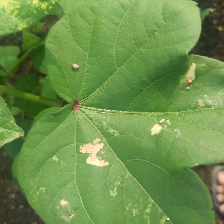

In [129]:
img

In [130]:
x=image.img_to_array(img)
x

array([[[223., 235., 133.],
        [229., 241., 139.],
        [225., 237., 135.],
        ...,
        [ 53.,  51.,  36.],
        [ 62.,  54.,  35.],
        [ 61.,  53.,  34.]],

       [[219., 231., 129.],
        [220., 232., 130.],
        [223., 235., 133.],
        ...,
        [ 51.,  49.,  34.],
        [ 60.,  52.,  33.],
        [ 63.,  55.,  36.]],

       [[223., 235., 133.],
        [220., 232., 130.],
        [228., 240., 138.],
        ...,
        [ 49.,  47.,  32.],
        [ 66.,  58.,  39.],
        [ 71.,  63.,  44.]],

       ...,

       [[ 56.,  50.,  36.],
        [ 56.,  50.,  36.],
        [ 56.,  50.,  36.],
        ...,
        [105.,  89.,  73.],
        [ 87.,  75.,  61.],
        [ 77.,  65.,  51.]],

       [[ 54.,  51.,  32.],
        [ 58.,  53.,  33.],
        [ 57.,  49.,  28.],
        ...,
        [128., 104.,  76.],
        [100.,  85.,  64.],
        [ 78.,  63.,  42.]],

       [[ 58.,  55.,  36.],
        [ 62.,  57.,  37.],
        [ 61.,  

In [131]:
x.shape

(224, 224, 3)

In [132]:
test_image = image.img_to_array(x)
test_image = test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

In [133]:
result

array([[9.9990344e-01, 2.0439324e-10, 9.6069656e-05, 4.3407911e-07]],
      dtype=float32)

In [134]:
model.predict(test_image)

array([[9.9990344e-01, 2.0439324e-10, 9.6069656e-05, 4.3407911e-07]],
      dtype=float32)

In [135]:
a=np.argmax(model.predict(test_image), axis=1)

In [136]:
a

array([0])

In [137]:
if a == 0:
    print("Diseased cotton leaf")
elif a == 1:
  print("Diseased cotton plant")
elif a == 2:
  print("Fresh cotton leaf")
else:
  print("Fresh cotton plant")

Diseased cotton leaf
